In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
%matplotlib inline

In [19]:
N = 100
alpha = 0.95
a, sigma_kv = (0,1)
X = sps.norm.rvs(size=N)

In [31]:
def show_interval(X_0, theta_eval, title , bound):
    x = np.arange(1, N + 1, 1)
    
    y_min = [theta_eval[0](X_0[:k], k) for k in x]
    y_max = [theta_eval[1](X_0[:k], k) for k in x]
    
    fig = plt.figure(figsize=(20, 15))
    
    ax = fig.gca()
    
    plt.fill_between(x, y_min, y_max)

    ax.set_xlim(0, N)
    a,b = bound
    ax.set_ylim(a, b)
    plt.title(title,fontsize=15)
    plt.show()

In [39]:

when_we_dont_know_a = [(lambda x, n: 0), 
                       (lambda x, n: n * np.var(x) / st.chi2.ppf(1 - alpha, df=n-1))]

params = [when_we_know_sigma_kv, when_we_know_a, when_we_dont_know_sigma_kv, when_we_dont_know_a]
bounds = [[-1,1], [0,3], [-1.5,1.5], [-0.5, 2.5]]
titles = [r'when we know $\sigma^2$',r'when we know $a$',
          r'when we don\'t know $\sigma^2$', r'when we don\'t know $a$' ]

При известном $\sigma^2 = 1$:

$\overline{X}$ распределено нормально с $E\overline{x}=a$, $D\overline{x} = \frac{\sigma^2}{n}$ $\Rightarrow (\overline{X} - a) \cdot \sqrt{n} \sim \mathcal{N}(0, 1) \Rightarrow$ $P(|\sqrt{n}\cdot(\overline{X} - a)|<z_{\frac{1 + \alpha}{2}}) = P(\overline{X} - \frac{z_{\frac{1 + \alpha}{2}}}{\sqrt{n}} < a < \overline{X} + \frac{z_{\frac{1 + \alpha}{2}}}{\sqrt{n}}) = \alpha$

Где $z_{\frac{1+\alpha}{2}}$ - квантиль уровня $\frac{1+\alpha}{2}$ стандартного нормального распределения

In [22]:
when_we_know_sigma_kv = [(lambda x, n: np.mean(x) - sps.norm.ppf(0.5 + alpha / 2) * n ** -0.5),
                         (lambda x, n: np.mean(x) + sps.norm.ppf(0.5 + alpha / 2) * n ** -0.5)]

Если же известно $a = 0$, то известно, что $\sum(X_i - a)^2 = \sum X_i^2$ распределена по закону $\chi_{n}^2 \sigma^2$ 
Тогда $\frac{1}{\sigma^2}\sum X_i^2 \sim \chi^2_{n}$

Получим точный доверительный интервал уровня $\alpha$ как:

$P(\frac{\sum X_i^2}{z_{\frac{1-\alpha}{2}}} < \sigma^2 < \frac{\sum X_i^2}{z_{\frac{1+\alpha}{2}}}) = \alpha$

Где $z_{\frac{1 \pm \alpha}{2}}$ - квантиль уровня $\frac{1 \pm \alpha}{2}$ распределения $\chi^2_{n}$


In [23]:
when_we_know_a = [(lambda x, n: np.sum(x * x) / sps.chi2.ppf(0.5 + alpha / 2, df=n)),
                  (lambda x, n: np.sum(x * x) / sps.chi2.ppf(0.5 - alpha / 2, df=n))]

При неизвестном $\sigma^2$:

$X_i = a + \xi_i,$ $\xi_i \sim \mathcal{N}(0, \sigma^2)$

$\vec{a} = (a .. a)^T$, $\vec{x} = \vec{a} +\vec{\xi}$

Взяв $\vec{z} = (1 .. 1)^T,\ $ получим : $\hat{a} = (z^Tz)^{-1}z^TX = \overline{X}$

$\frac{|\vec{X} - \vec{z} \cdot \hat{a}|^2}{\sigma^2} \sim \chi_{n - 1}^2$ , a $\ \hat a \sim \mathcal{N}(a, \frac{\sigma^2}{n})$

$\frac{|\vec{X} - \vec{z} \cdot \hat{a}|^2}{\sigma^2} \bot \hat a \ \Rightarrow \ \frac{(\overline{X} - a)\sqrt{n - 1}}{\sqrt{s^2}} \sim T_{n - 1}$ 

$\href{https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A1%D1%82%D1%8C%D1%8E%D0%B4%D0%B5%D0%BD%D1%82%D0%B0}{Распределение\ Стьюдента}$

Отсюда доверительный интервал выражается через квантиль уровня $\frac{1+\alpha}{2}$ распределения Стьюдента как:
$P(\frac{|\overline{X} - a|\sqrt{n - 1}}{\sqrt{s^2}} < z_{\frac{1 + \alpha}{2}}) = P(\overline{X} - \frac{z_{\frac{1 + \alpha}{2}} \cdot \sqrt{s^2}}{\sqrt{n - 1}} < a < \overline{X} + \frac{z_{\frac{1 + \alpha}{2}} \cdot \sqrt{s^2}}{\sqrt{n - 1}}) = \alpha$

In [35]:
when_we_dont_know_sigma_kv = [(lambda x, n: np.mean(x) - sps.t.ppf(0.5 + alpha / 2, n - 1) 
                               * (np.var(X) / (len(X)-1)) ** 0.5 ),
                              (lambda x, n: np.mean(x) + sps.t.ppf(0.5 + alpha / 2, n - 1) 
                               * (np.var(X) / (len(X)-1)) ** 0.5)]


При неизвестном $\sigma^2$:

$X_i = a + \xi_i,$ $\xi_i \sim \mathcal{N}(0, \sigma^2)$

$\vec{a} = (a .. a)^T$, $\vec{x} = \vec{a} +\vec{\xi}$

Взяв $\vec{z} = (1 .. 1)^T,\ $ получим : $\hat{a} = (z^Tz)^{-1}z^TX = \overline{X}$

$\frac{|\vec{X} - \vec{z} \cdot \hat{a}|^2}{\sigma^2} = \frac{ns^2}{\sigma^2} \sim \chi_{n - 1}^2$  

Тогда: $P(0 < \frac{z_{1 - \alpha}}{ns^2} <  \frac{1}{\sigma^2}) = P(0 < \sigma^2 < \frac{ns^2}{z_{1 - \alpha}}) = \alpha$

Где $z_{1 - \alpha}$ - квантиль уровня $ 1 - \alpha$ распределения $\chi^2_{n - 1}$




In [37]:
when_we_dont_know_a = [(lambda x, n: 0), 
                       (lambda x, n: n * np.var(x) / st.chi2.ppf(1 - alpha, df=n-1))]

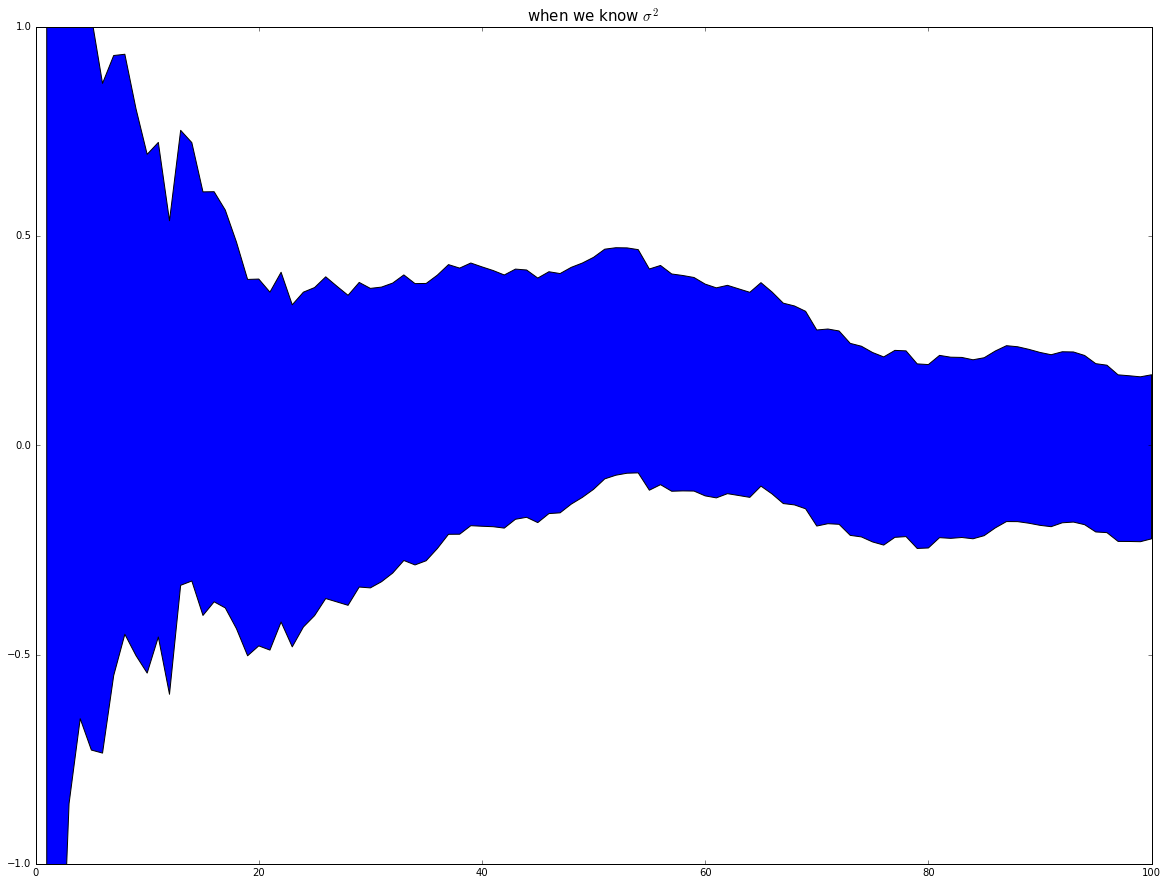

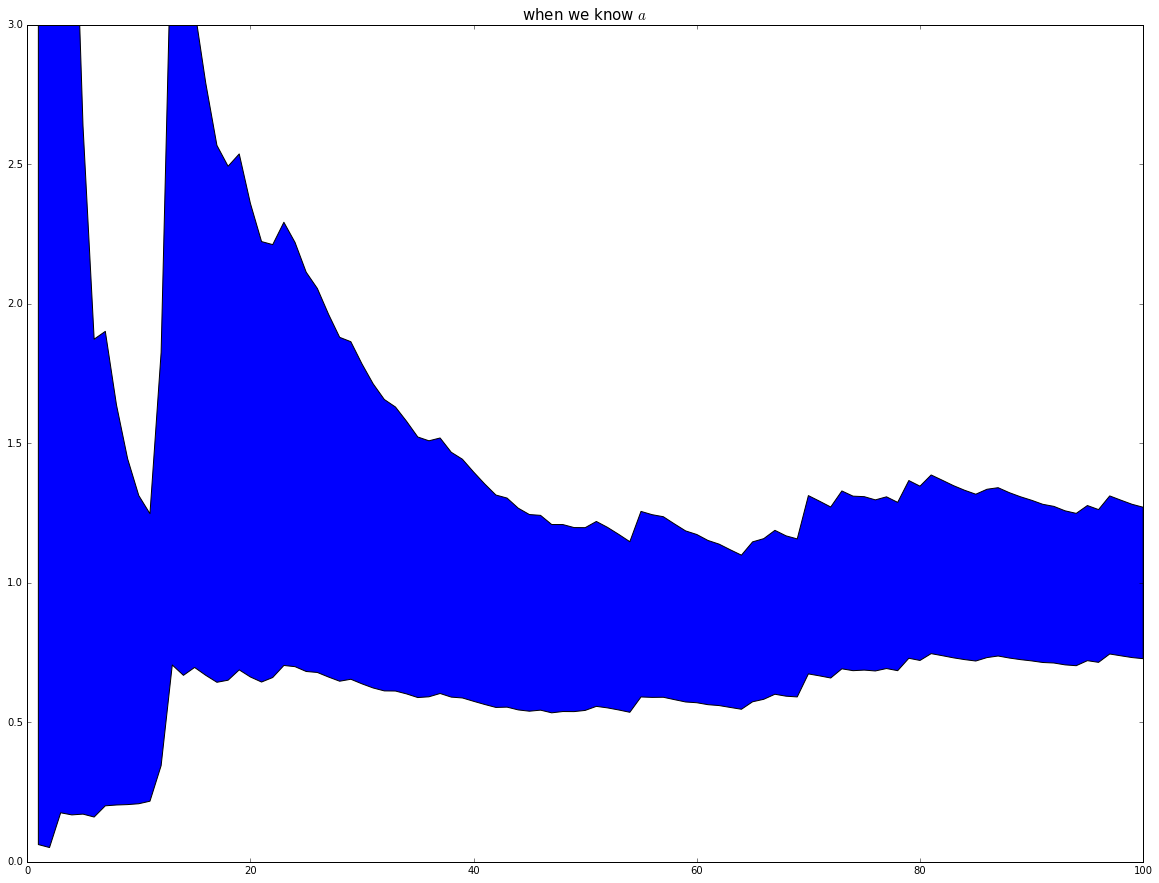

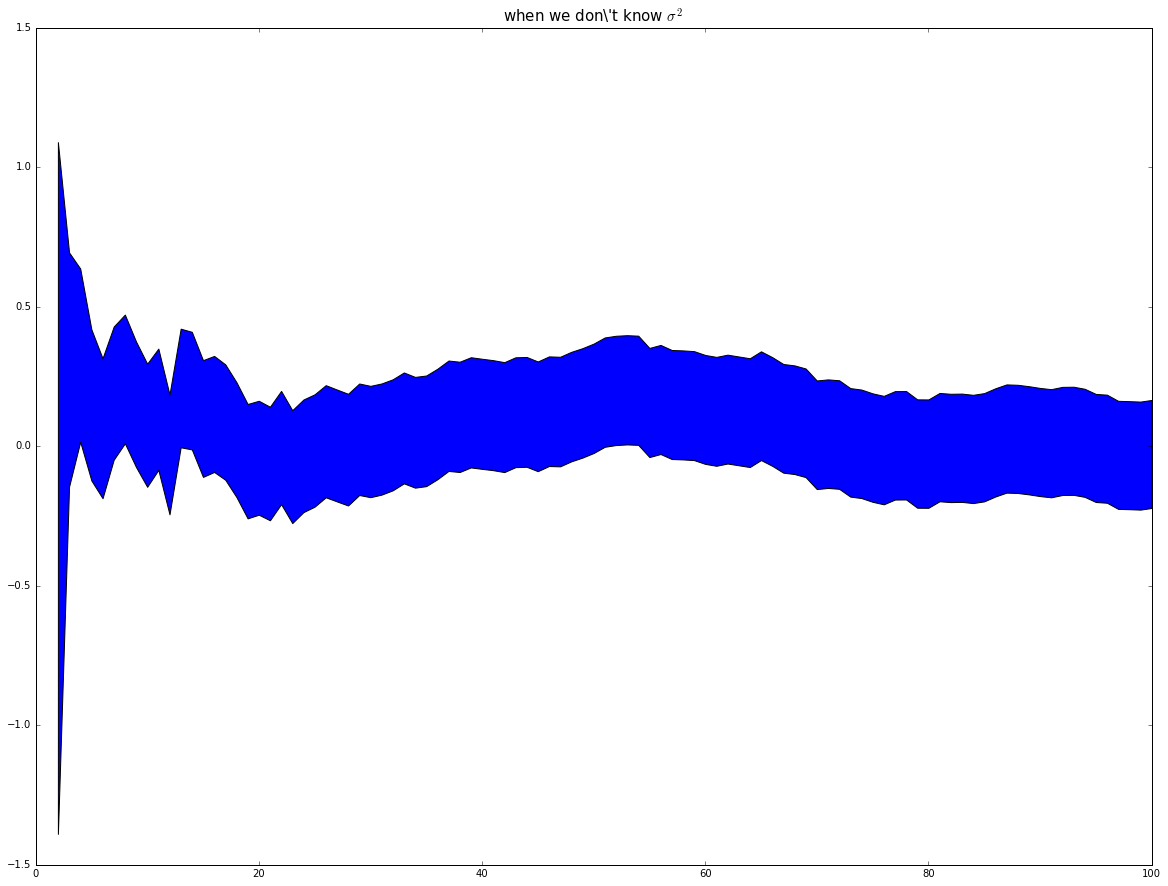

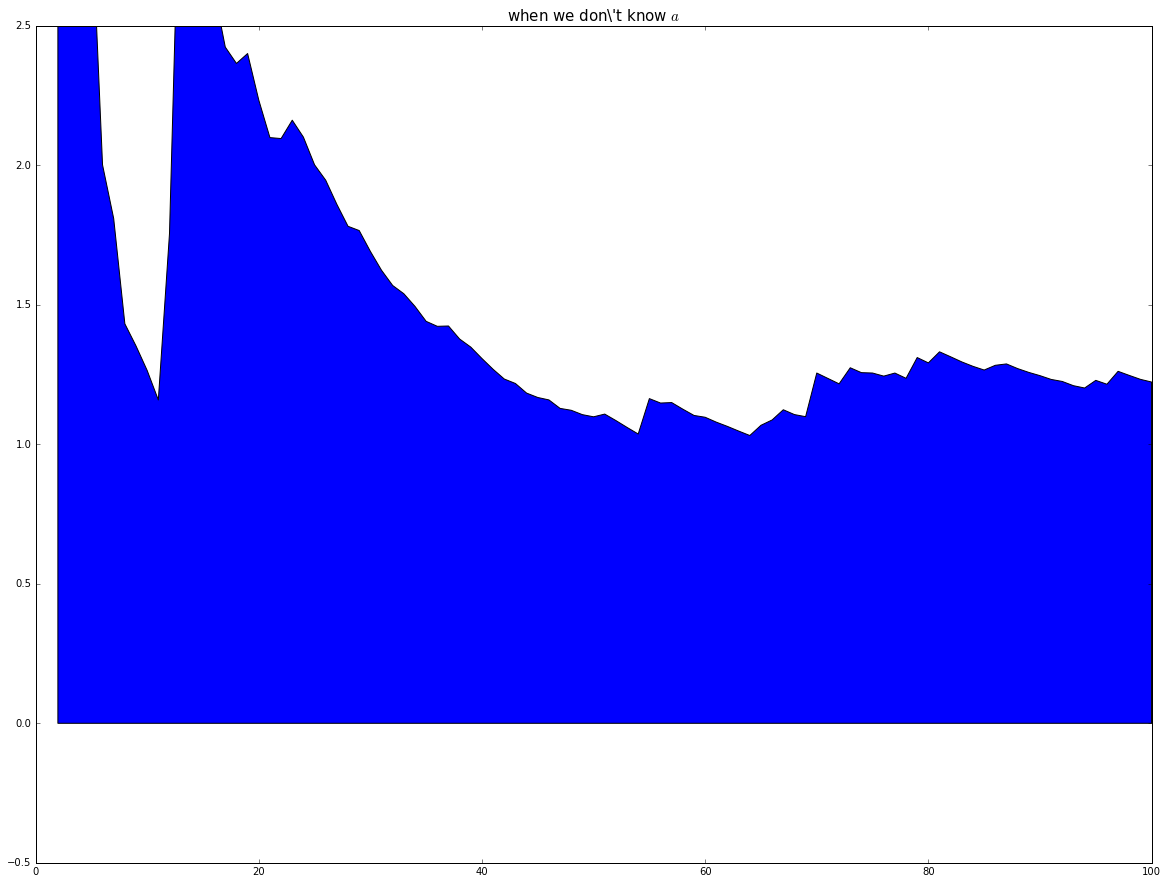

In [40]:
for i in range(4):
    show_interval(X, params[i], titles[i], bounds[i])